# Homework 2

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Question One

In [2]:
# Problem 1 & Problem 2

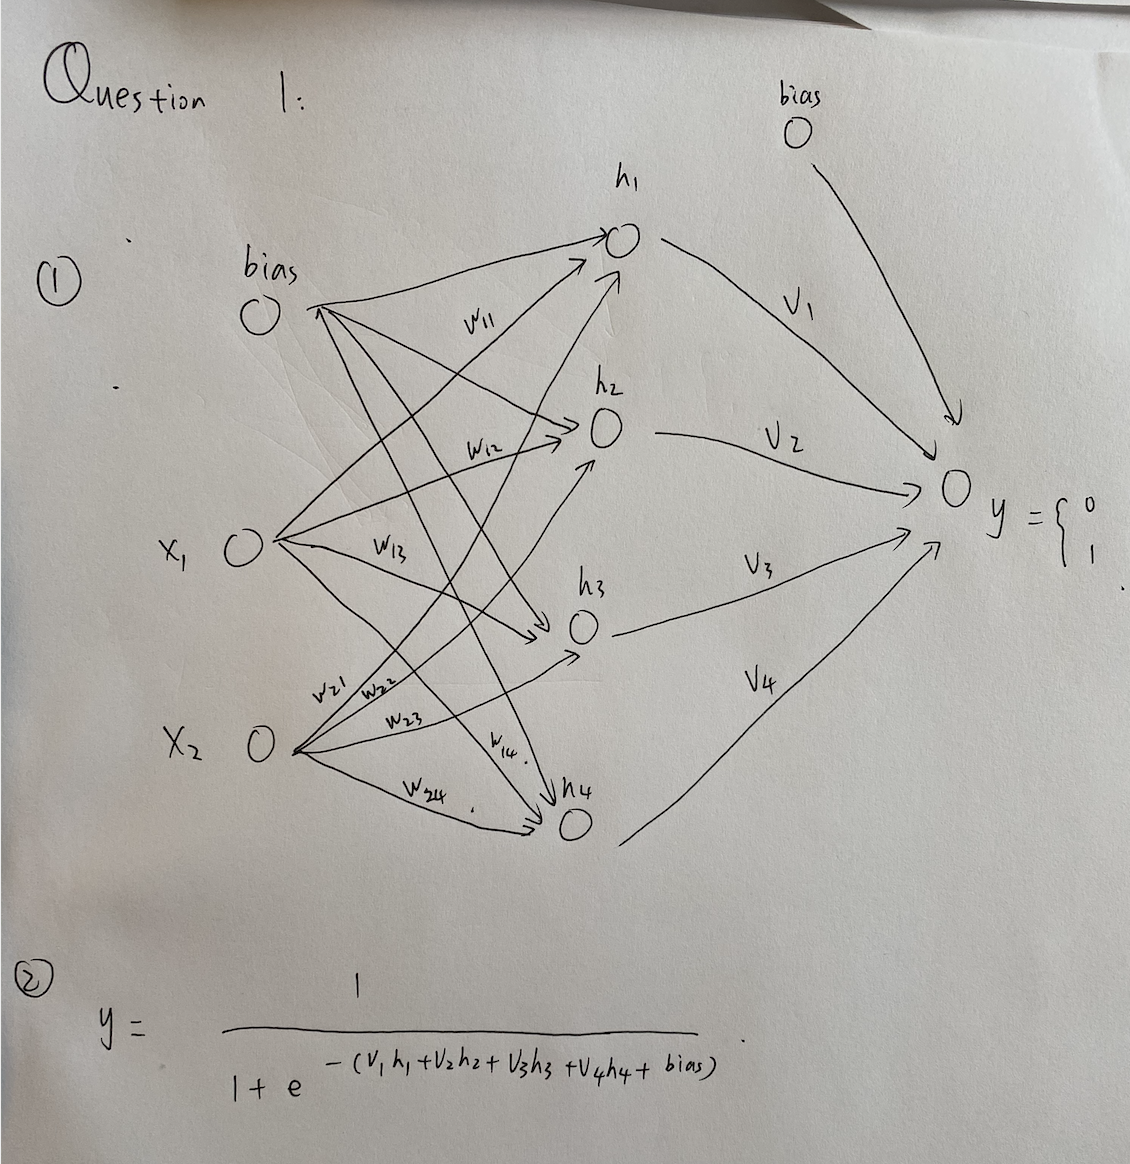

In [3]:
# Problem 3:

In [26]:
# relu
def ff_nn_Relu(x,w,b1):
    first = np.dot(w,x)+b1
    return tf.nn.relu(first)

# sigmoid
def ff_nn_Sigmoid(x,w,v,b1,b2):
    second = ff_nn_Relu(x,w,b1)
    return tf.nn.sigmoid(np.dot(v,second)+b2)

In [6]:
# Problem 4:

In [27]:
v = np.array([[1,0,-1,1]])
w = np.array([[1,0],[-1,0],[0,0.5],[1,1]])
b1 = np.array([[0,0,1,0]]).T
x = np.array([[1,0,0],[-1,-1,1]])
b2 = [1]

ff_nn_Sigmoid(x,w,v,b1,b2)

# so we can find the probability is 0.817, 0.622 and 0.622

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.81757448, 0.62245933, 0.62245933]])>

In [28]:
# Question 2:

In [29]:
# Problem 1

The partial derivatives for x is:

f = -3x^2 + 100x - 200y^2

The partial derivatives for y is:

f = 800y^3 - 400xy

In [30]:
# Problem 2

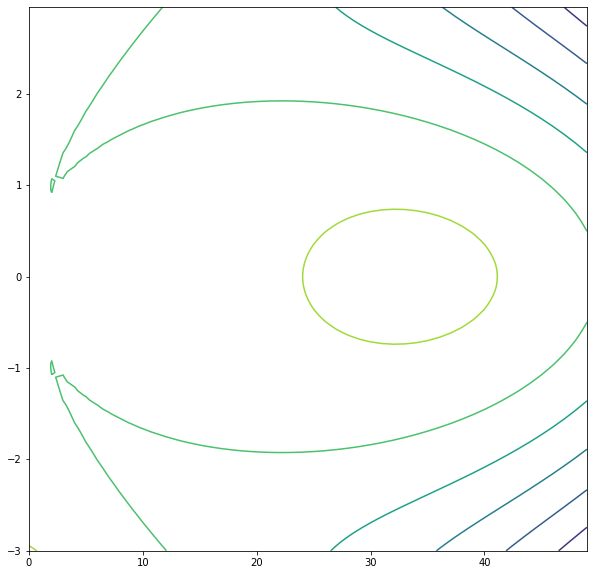

In [55]:
def f(x, y):
    return 3-x*x*x+50*(2*(y*y)-x)*(2*(y*y)-x)


def df(x, y):
    return -3*(x*x)-100*(2*(y*y)-x), 400*(2*(y*y)-x)*y

x = np.arange(0,50,1)
y = np.arange(-3,3,0.05)
mesh_x,mesh_y = np.meshgrid(x,y)
plt.figure(figsize=(10,10))
plt.contour(mesh_x,mesh_y,f(mesh_x,mesh_y))

In [57]:
# Problem 3

In [66]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2) + 100*x - 200*(y**2)
    df_dy = 800*(y**3) - 400*x*y
    return np.array([df_dx, df_dy])

In [90]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-2,2,size=2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point-learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

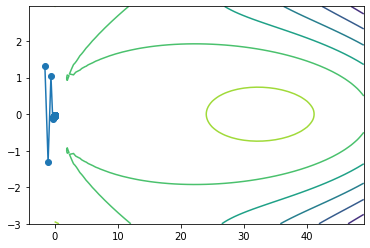

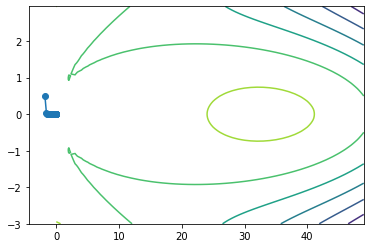

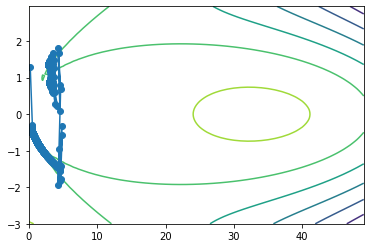

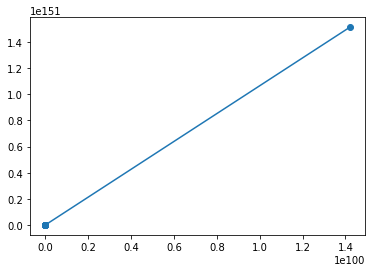

In [91]:
for learning_rate in [0.01,0.001,0.0001,0.00001]:
    traj = grad_descent(iterations=10000, learning_rate=0.001)

    fig, ax = plt.subplots()
    CS = ax.contour(mesh_x, mesh_y, f(mesh_x,mesh_y))
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    plt.show()

In [92]:
# Problem 4

In [108]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-2,2,size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations): 
        v = v*alpha + grad_f(point)*epsilon
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

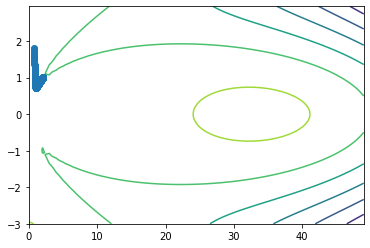

In [111]:
# alpha = 0.5, epsilon = 0.00001
traj = grad_descent_with_momentum(iterations=10000,alpha=0.5,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(mesh_x,mesh_y,f(mesh_x,mesh_y))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

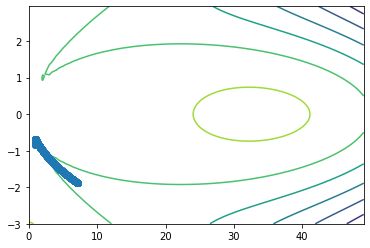

In [114]:
# alpha = 0.7, epsilon = 0.00001
traj = grad_descent_with_momentum(iterations=10000,alpha=0.7,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(mesh_x,mesh_y,f(mesh_x,mesh_y))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

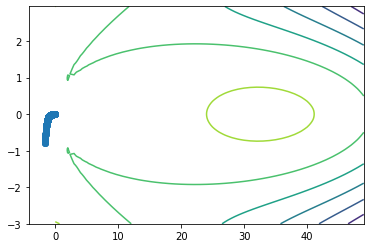

In [123]:
# alpha = 0.3, epsilon = 0.00001
traj = grad_descent_with_momentum(iterations=100000,alpha=0.3,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(mesh_x,mesh_y,f(mesh_x,mesh_y))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [124]:
# Question 3:

In [125]:
# Problem 1

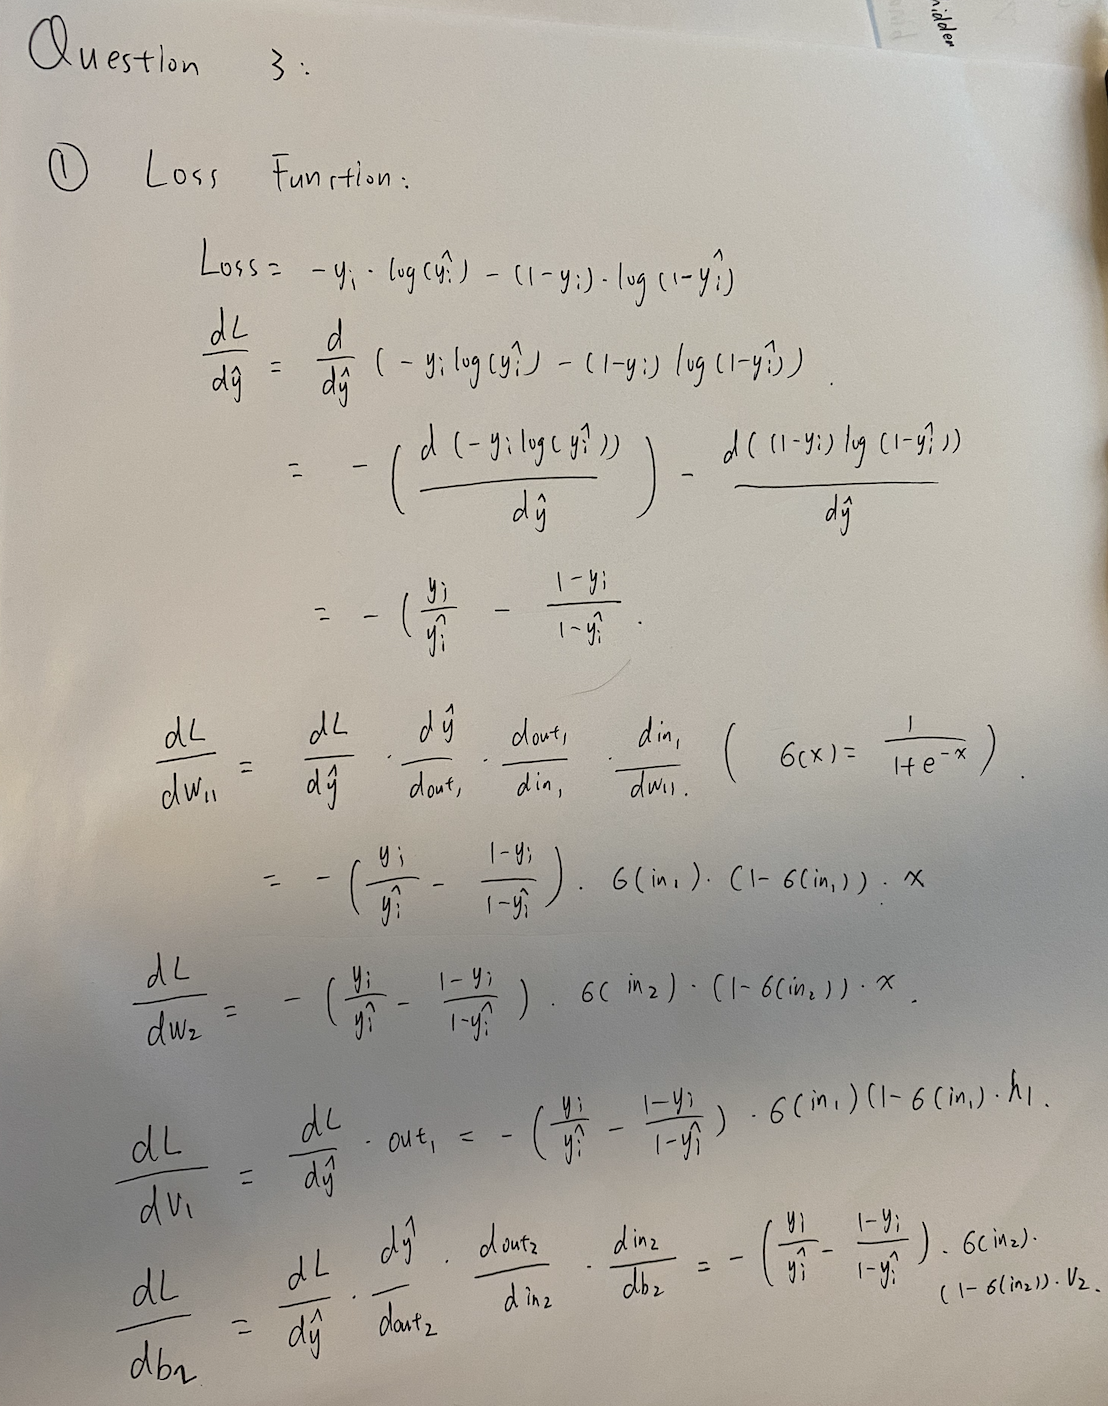

In [126]:
# Problem 2

In [295]:
loss = tf.keras.losses.BinaryCrossentropy()

def relu(z):
    return np.maximum(z,0)

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def relu_sigmoid(X,params):
    h = tf.nn.relu(tf.matmul(params[0],X)+params[1])
    return tf.nn.sigmoid(tf.matmul(params[2],h)+params[3])

def grad_f(X,y,params):
    with tf.GradientTape() as tape:
        second = relu_sigmoid(X,params)
        f = loss(y,second)
    print(tape.gradient(f,params))

    

In [296]:
W = np.random.uniform(-2,2,(4,2))
B = np.random.uniform(-1,1,(4,1))
V = np.random.uniform(-1,1,(1,4))
C = np.random.uniform(-1,1,(1,))
X = np.random.uniform(-2,2,(2,3))
Y = np.array([0,0,1])
params = [tf.Variable(p) for p in [W,B,V,C]]
grad_f(X,Y,params)

[<tf.Tensor: shape=(4, 2), dtype=float64, numpy=
array([[ 0.0622421 , -0.03964736],
       [ 0.00152154, -0.006057  ],
       [-0.1015141 ,  0.06637693],
       [ 0.00154805, -0.00616255]])>, <tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[ 0.04265764],
       [-0.00469376],
       [-0.06764034],
       [-0.00477556]])>, <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[-0.67550533,  0.01501299, -0.33106158,  0.00637001]])>, <tf.Tensor: shape=(1,), dtype=float64, numpy=array([-0.11620724])>]


In [255]:
# Problem 3

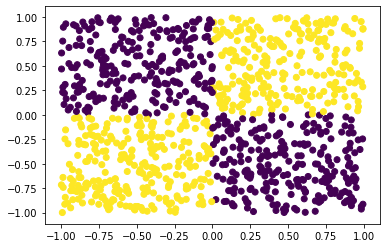

In [401]:
def binary_classification_data(N):
    x = np.random.uniform(-1,1,(N,2))
    y = (x[:, 0] * x[:, 1] > 0).astype(np.float32)
    return x, y

x,y = binary_classification_data(1000)
plt.scatter(x[:,0],x[:,1],c=y)

In [259]:
# Problem 4

In [330]:
def grad_step(x, y, params,step_size):
    with tf.GradientTape() as tape:
        second = relu_sigmoid(x,params)
        loss_value = loss(y,second)
    grads = tape.gradient(loss_value, params)
    
    for var, grad in zip(params, grads):
        var.assign(var - step_size * grad)
    return loss_value

In [334]:
x = x.astype('float32')
y = y.astype('float32')
losses = []
for i in range(1000):
    losses.append(grad_step(x.T,y,params,0.1))

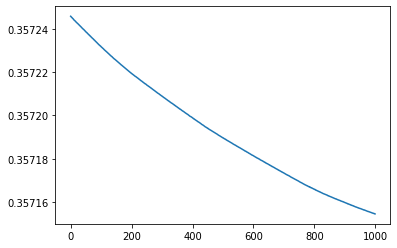

In [335]:
plt.plot(losses)

In [336]:
# Problem 5

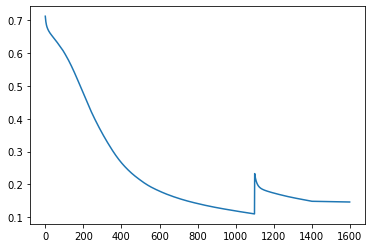

In [416]:
def grad_step_with_momentum(x,y,params,learning_rate,epsilon,v):
    with tf.GradientTape() as tape:
        second = relu_sigmoid(x,params)
        loss_value = loss(y,second)
    grads = tape.gradient(loss_value, params)
    for var, grad,value in zip(params, grads,v):
        value = learning_rate*value + epsilon*grad
        var.assign(var - value)
    return loss_value

x = x.astype('float32')
y = y.astype('float32')

v=tf.zeros(15)
for i in range(100):
    losses.append(grad_step_with_momentum(x.T,y,params,0.5, 0.01,v))  
plt.plot(losses)
plt.show()

In [417]:
# Problem 6

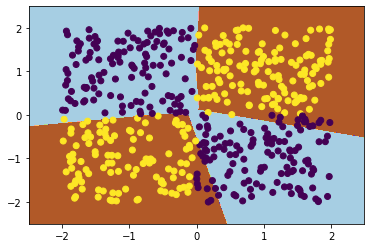

In [418]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
inp = np.c_[xx.ravel(), yy.ravel()]
y_hat = ff_nn_new(tf.Variable(inp.T,dtype='float32'),params)
z=y_hat.numpy()
z= np.where(z >= 0.5, 1, 0)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y)

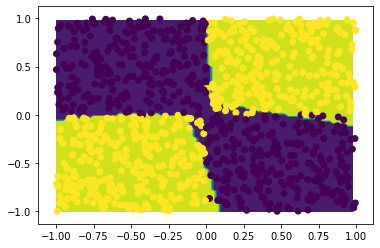

In [428]:
delta = 0.025
x1 = np.arange(-1,1,delta)
x2 = np.arange(-1,1,delta)
X1,X2 = np.meshgrid(x1,x2)
map_ = np.c_[X1.ravel(),X2.ravel()]
yhat = relu_sigmoid(tf.Variable(map_.T,dtype='float32'),params)
z = yhat.numpy()
z = np.where(z>=0.5,1,0)
z = z.reshape(X1.shape)
plt.contourf(X1,X2,z)
plt.scatter(x[:,0],x[:,1],c=y)